In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [10]:
# Load the NPZ file
data = np.load('0_6_0.npz')

# View available arrays
print(data.files)

# Access arrays by name
array1 = data['matrices']

# Or iterate through all arrays
for key in data.files:
    print(f"{key}: {data[key]}")

['coords', 'matrices']
coords: [[2.500e-01 2.500e-01 1.500e+00]
 [2.500e-01 7.500e-01 1.500e+00]
 [2.500e-01 1.250e+00 1.500e+00]
 ...
 [2.558e+02 2.548e+02 1.500e+00]
 [2.558e+02 2.552e+02 1.500e+00]
 [2.558e+02 2.558e+02 1.500e+00]]
matrices: [[[-2.765e-18-2.532e-17j -7.885e-18-2.424e-17j -1.268e-17-2.214e-17j
   -1.695e-17-1.910e-17j]
  [-2.513e-17+4.170e-18j -2.377e-17+9.222e-18j -2.140e-17+1.389e-17j
   -1.813e-17+1.799e-17j]
  [ 5.561e-18+2.486e-17j  1.053e-17+2.322e-17j  1.506e-17+2.060e-17j
    1.897e-17+1.710e-17j]
  [ 2.451e-17-6.936e-18j  2.260e-17-1.181e-17j  1.973e-17-1.619e-17j
    1.602e-17-1.989e-17j]]

 [[-1.153e-18-2.548e-17j -6.338e-18-2.473e-17j -1.126e-17-2.293e-17j
   -1.572e-17-2.017e-17j]
  [-2.536e-17+2.708e-18j -2.430e-17+7.838e-18j -2.220e-17+1.264e-17j
   -1.917e-17+1.693e-17j]
  [ 4.253e-18+2.515e-17j  9.308e-18+2.377e-17j  1.398e-17+2.139e-17j
    1.807e-17+1.810e-17j]
  [ 2.484e-17-5.782e-18j  2.316e-17-1.074e-17j  2.049e-17-1.526e-17j
    1.696e-17-1.914

In [11]:
print(len(array1))
data_arr = array1[:512]

262144


In [12]:
# divide data_arr by its average value for each entry
data_arr = data_arr / np.mean(np.abs(data_arr).flatten())


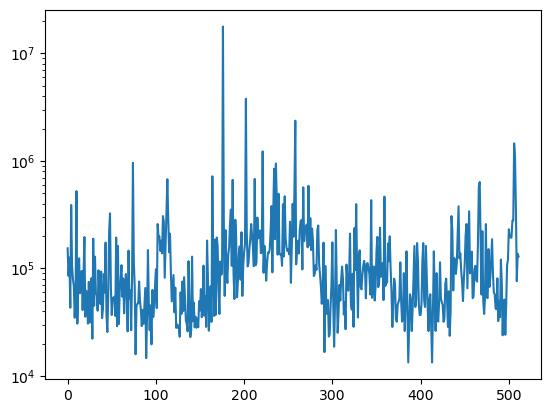

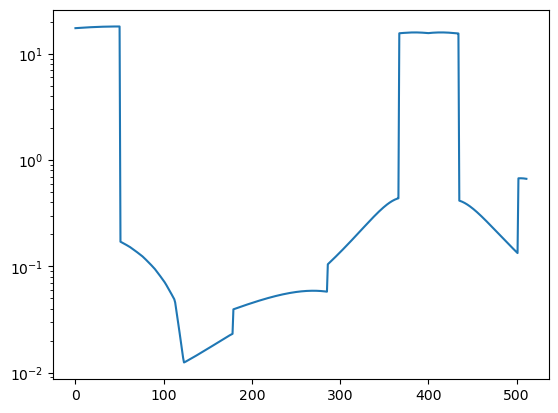

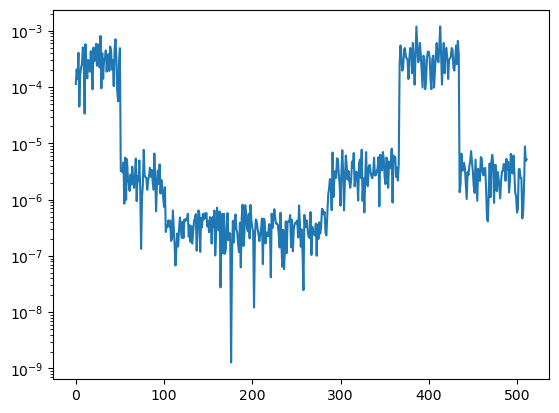

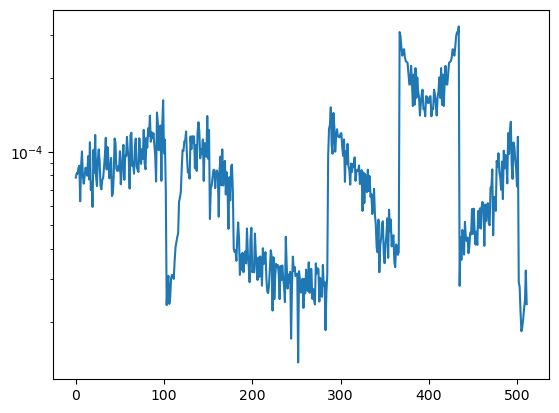

In [13]:

# Compute singular values for all matrices in array1
sv_arr = np.zeros((0, 4))
for i, matrix in enumerate(data_arr):
    if not np.isnan(matrix).any():
        U, s, Vt = np.linalg.svd(matrix)
        sv_arr = np.vstack([sv_arr, s])


plt.semilogy(sv_arr[:, 0]/ sv_arr[:, -1])

plt.show()
plt.semilogy(sv_arr[:, 0])

plt.show()
plt.semilogy(sv_arr[:, -1])

plt.show()
plt.semilogy(sv_arr[:, 1]/sv_arr[:, 0])


In [14]:
def clustering_alg(data: np.ndarray, n_clusters = 2):

    data_arr = data / np.mean(np.abs(data).flatten())

    # Determine number of clusters (for example, 1 cluster per 50 samples)
    

    sv_arr = np.zeros((0, 4))

    # Compute singular values for all matrices in data_arr
    for i, matrix in enumerate(data_arr):
        if not np.isnan(matrix).any():
            U, s, Vt = np.linalg.svd(matrix)
            s = s/s[0]
            sv_arr = np.vstack([sv_arr, s])

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(sv_arr)
    return kmeans.labels_, kmeans.cluster_centers_

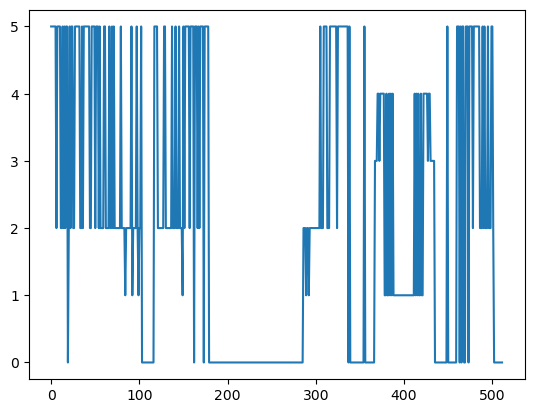

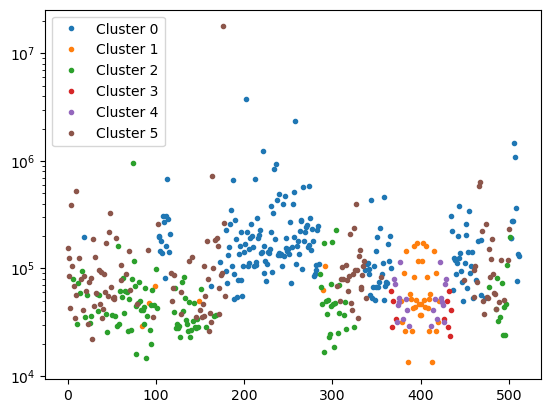

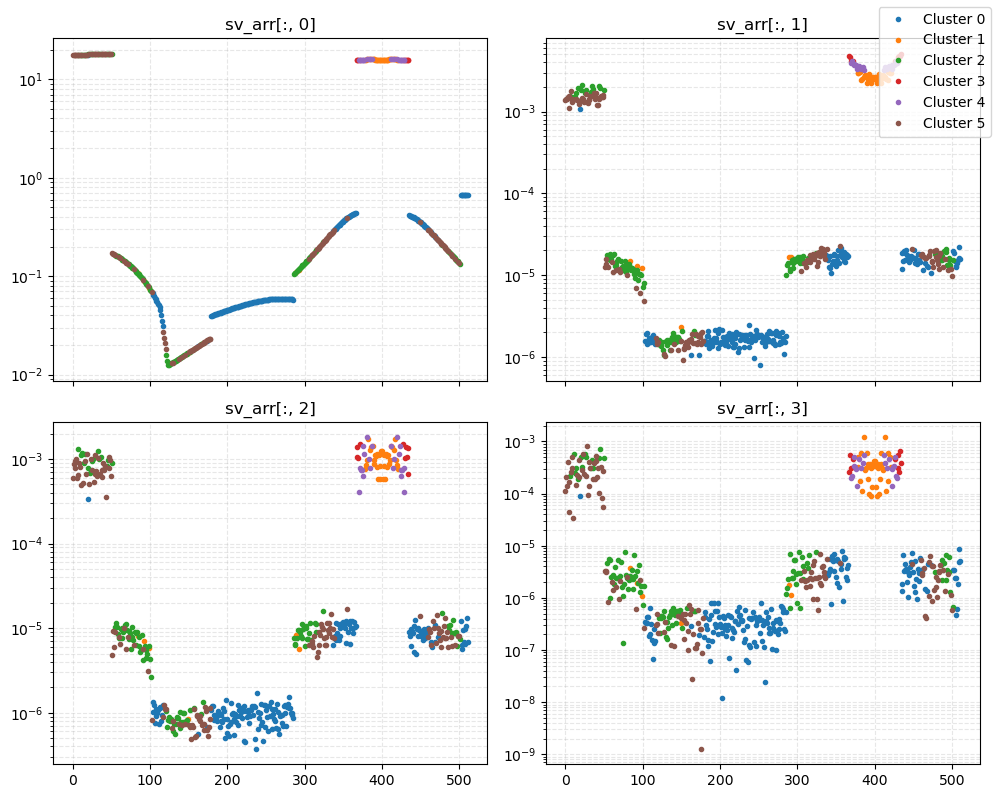

[]

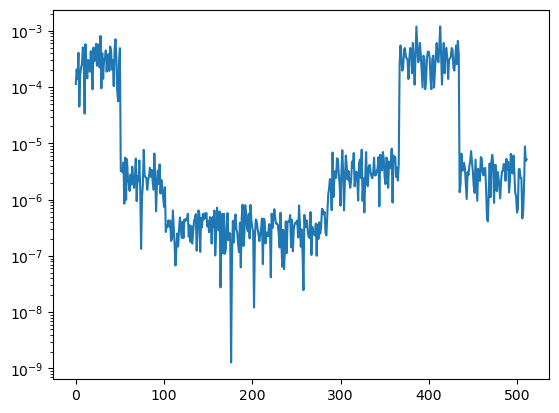

In [15]:
labels, centers = clustering_alg(data_arr, 6)

plt.plot(labels)
plt.show()
for label in np.unique(labels):
    idx = labels == label
    plt.semilogy(np.where(idx)[0], (sv_arr[idx, 0] / sv_arr[idx, -1]), '.', label=f'Cluster {label}')
plt.legend()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
axes = axes.ravel()

for col in range(4):
    ax = axes[col]
    for label in np.unique(labels):
        idx = labels == label
        ax.semilogy(np.where(idx)[0], sv_arr[idx, col], '.', label=f'Cluster {label}')
    ax.set_title(f'sv_arr[:, {col}]')
    ax.grid(True, which='both', ls='--', alpha=0.3)

handles, legend_labels = axes[0].get_legend_handles_labels()
fig.legend(handles, legend_labels, loc='upper right')
plt.tight_layout()
plt.show()
# plt.plot(centers.reshape(centers.shape[0], -1).T)
plt.semilogy(sv_arr[:, -1])
plt.plot()


In [ ]:
# Parameters
rho = 10  # SNR in linear scale (adjust as needed)
N_t = 4   # Number of transmit antennas
N_r = 4   # Number of receive antennas

# Calculate ergodic channel capacity for each channel matrix
capacity = np.zeros(len(data_arr))

for i, H in enumerate(data_arr):
    if not np.isnan(H).any():
        # Calculate HH^H (H times H conjugate transpose)
        HH_H = H @ H.conj().T
        
        # Calculate C = log2(det(I_Nr + (rho/N_t) * HH^H))
        I_Nr = np.eye(N_r)
        capacity[i] = np.log2(np.linalg.det(I_Nr + (rho / N_t) * HH_H).real)

# Plot the ergodic channel capacity
plt.figure(figsize=(10, 6))
plt.plot(capacity)
plt.xlabel('Channel Realization Index')
plt.ylabel('Channel Capacity (bits/s/Hz)')
plt.title(f'Ergodic Channel Capacity (SNR = {10*np.log10(rho):.1f} dB)')
plt.grid(True, alpha=0.3)
plt.show()

# Print average capacity
print(f'Average Ergodic Capacity: {np.mean(capacity):.4f} bits/s/Hz')